<a href="https://colab.research.google.com/github/love-bees/twitter/blob/master/data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd

data = pd.read_csv('data.csv', encoding='utf-8')
data.head()

,1248318643848568833,2020-04-09 18:35:31,"41.34473, 1.6992",ca,b'teletreball teletreballdocent teletreballconfinades covid_19 sarscov2 joemfotocasa',b'Fins el monyo del #teletreball #teletreballdocent #teletreballconfinades de la #covid_19 #sarscov2 i del #joemfotocasa !!! @ Vilafranca del Pened\xc3\xa8s https://t.co/xngXtLSnkw'
0,1248318627935182849,2020-04-09 18:35:28,"6.05861, -75.5031",es,b'jardin jardines huerta esposa love enamorado...,b'Ella! Siempre ella! Qui\xc3\xa9n no se enamo...
1,1248318622113693698,2020-04-09 18:35:26,"42.9607521, -80.05056563",en,b'',"b'Hey everyone , won\xe2\x80\x99t be streaming..."
2,1248318523908198400,2020-04-09 18:35:03,"38.7261, -9.1394",et,b'photodocumentary moon exterior isolation cov...,b'M O O N\n#photodocumentary\n#moon #exterior\...
3,1248318383763972100,2020-04-09 18:34:29,"53.55, -3.05",en,b'covid postcovid19 quarantine dogs',b'\xf0\x9f\xa6\xaeTop Tip Thursday \xf0\x9f\x9...
4,1248318271801053185,2020-04-09 18:34:03,"18.4596876, -69.9485084",es,b'',b'El bolet\xc3\xadn 21 con r\xc3\xa9cord de ca...


In [68]:
data.columns = ['id', 'time', 'geo', 'lang', 'hashtags', 'text']

Text(0.5, 0, 'Jezik')

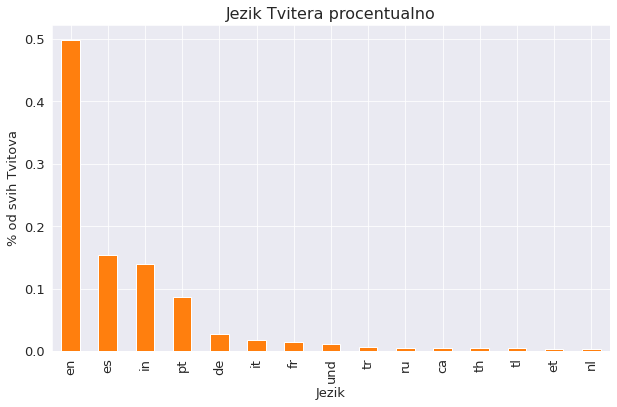

In [69]:
import matplotlib.pyplot as plt

x = data['lang'].value_counts(1).head(15)
x.plot(kind='bar',figsize=(10,6),fontsize=13,color='C1')
plt.title('Jezik Tvitera procentualno', fontsize=16)
plt.ylabel('% od svih Tvitova', fontsize=13)
plt.xlabel('Jezik', fontsize=13)

In [70]:
text = []
date = []
hashes = []
geo = []
for i, item in enumerate(data['lang']):
    if data['lang'][i] == 'en':
        text.append(data['text'][i])
        date.append(data['time'][i])
        hashes.append(data['hashtags'][i])
        geo.append(data['geo'][i])

In [71]:
import re

for i in range(len(text)):
    try:
        text[i] = bytes(text[i][2:-2], 'utf-8').decode('unicode_escape')
        hashes[i] = bytes(hashes[i][2:-1], 'utf-8').decode('unicode_escape')
        text[i] = re.sub(r'[^\x00-\x7F]+','', text[i])
        text[i] = text[i][:text[i].index('https://t.co/')]
        text[i] = text[i].replace("\n", '')
    except:
        continue

In [72]:
df = pd.DataFrame(columns=['datetime','coordinates','hashes', 'text'])
df['datetime'], df['coordinates'],df['hashes'], df['text'] = [date, geo, hashes, text]

In [73]:
df.head()

,datetime,coordinates,hashes,text
0,2020-04-09 18:35:26,"42.9607521, -80.05056563",,"Hey everyone , wont be streaming until this wh..."
1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ..."
2,2020-04-09 18:48:31,"40.89245946, -74.13999694",,Palestinian national heroine Bisan Al-Jubeh (u...
3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...
4,2020-04-09 18:47:04,"48.47593351, -81.32806152",,Neighbourhood getting loud for healthcare work...


In [74]:
df.to_csv('data_cleaned.csv')